In [22]:
import pandas as pd
import os 
import re
import matplotlib.pyplot as plt
import numpy as np

## Lendo arquivos de resultados

Coluna "variavel":
- categoria
- filme
- media

In [23]:
df_dict = {}
heuristicas = "../heuristicas"
for heuristica in os.listdir(heuristicas):
    f = os.path.join(heuristicas, heuristica)
    df_dict[heuristica] = pd.read_csv(f+"/results.csv")

In [24]:
def extract_value(file_name):
    return int((re.findall('\d+', file_name ))[0])

In [25]:
for df in df_dict.values():
    df["variavel_numero"] = df.apply(lambda x: extract_value(x["nome_arquivo"]), axis = 1)

In [26]:
df_dict["gulosa"].head()

,variavel,numero_filmes,alocacao_tempo,tempo_execucao,nome_arquivo,variavel_numero
0,categoria,24,24,0.006924,in22.txt,22
1,categoria,24,24,0.006664,in18.txt,18
2,categoria,24,24,0.006934,in6.txt,6
3,categoria,24,24,0.006489,in16.txt,16
4,categoria,23,23,0.006902,in8.txt,8


In [27]:
df_dict["gulosa_aleatoria"].head()

,variavel,numero_filmes,alocacao_tempo,tempo_execucao,nome_arquivo,variavel_numero
0,categoria,8,13,0.006732,in22.txt,22
1,categoria,8,15,0.006271,in18.txt,18
2,categoria,8,14,0.008220,in6.txt,6
3,categoria,9,12,0.006681,in16.txt,16
4,categoria,9,13,0.006606,in8.txt,8


## Análise de variáveis

In [7]:
def df_filter(df, variable):
    return df[df["variavel"] == variable]

### Número total de filmes

O número de categoria se mantém fixo (5 categorias) e o tempo médio de cada filme também (2 horas)

In [8]:
df_movie_variable_dict = {}
for k, v in df_dict.items():
    df_movie_variable_dict[k] = df_filter(v, "filme")
    df_movie_variable_dict[k] = df_movie_variable_dict[k].drop(["nome_arquivo"], axis = 1)


In [9]:
df_movie_variable_dict["gulosa"].head()

,variavel,numero_filmes,alocacao_tempo,tempo_execucao,variavel_numero
25,filme,17,17,0.002761,3660
26,filme,19,19,0.004647,6820
27,filme,13,13,0.004668,6990
28,filme,15,15,0.002636,2790
29,filme,18,18,0.001526,1680


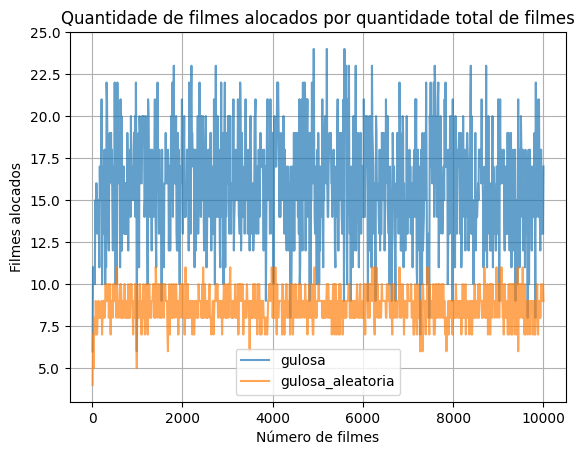

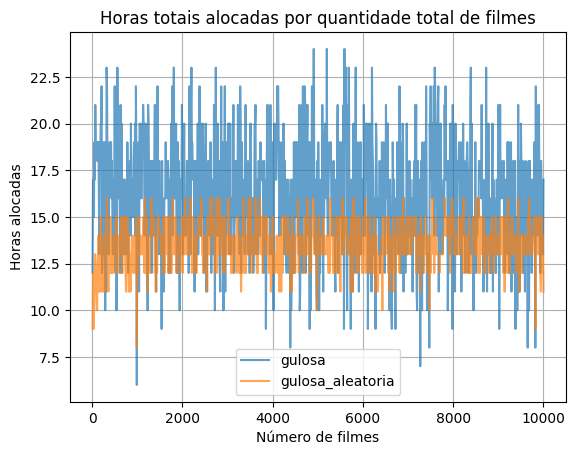

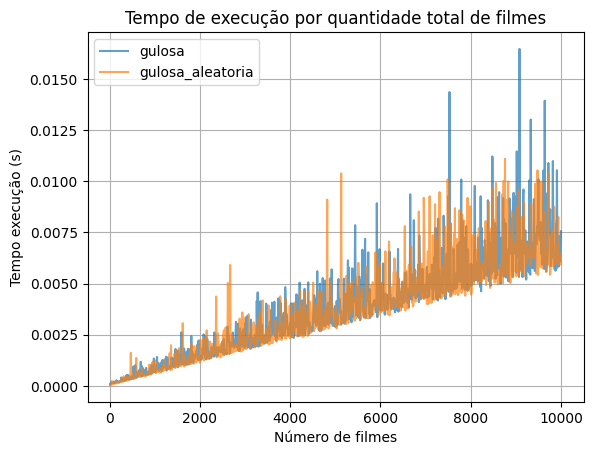

In [10]:
columns = ["numero_filmes", "alocacao_tempo", "tempo_execucao"]
settings = {"numero_filmes": ["Quantidade de filmes alocados", "Filmes alocados"],
         "alocacao_tempo": ["Horas totais alocadas", "Horas alocadas"],
         "tempo_execucao": ["Tempo de execução", "Tempo execução (s)"]}

for column in columns:
    for k, v in df_movie_variable_dict.items():
        xs, ys = zip(*sorted(zip(v["variavel_numero"], v[column])))
        plt.title("{} por quantidade total de filmes".format(settings[column][0]))
        plt.ylabel(settings[column][1])
        plt.xlabel("Número de filmes")
        plt.plot(xs, ys, label = k, alpha = 0.7)
    plt.legend()
    plt.grid(True)
    plt.show()

### Número total de categorias

O número de filmes se mantém fixo (10000 categorias) e o tempo médio de cada filme também (2 horas)

In [11]:
df_category_variable_dict = {}
for k, v in df_dict.items():
    df_category_variable_dict[k] = df_filter(v, "categoria")
    df_category_variable_dict[k] = df_category_variable_dict[k].drop(["nome_arquivo"], axis = 1)

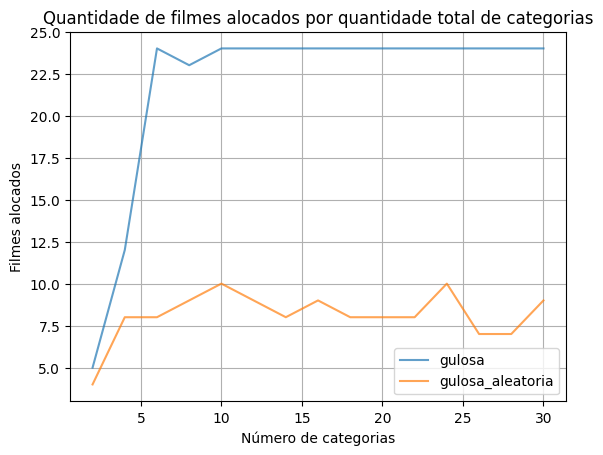

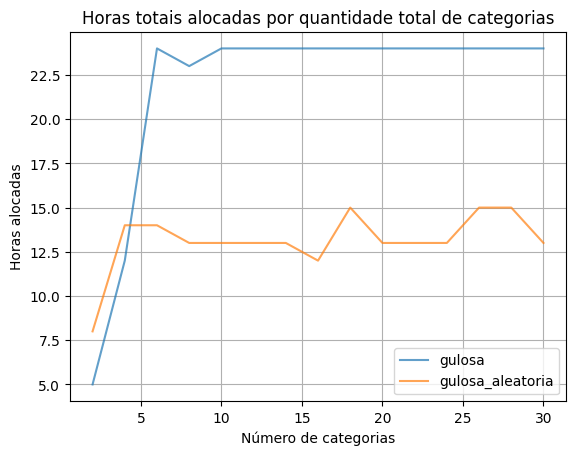

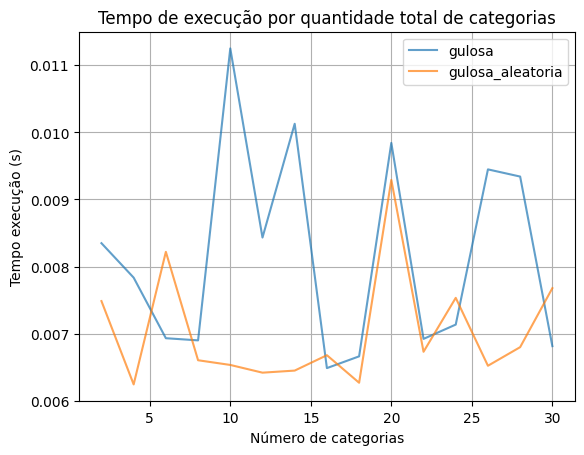

In [12]:
columns = ["numero_filmes", "alocacao_tempo", "tempo_execucao"]
settings = {"numero_filmes": ["Quantidade de filmes alocados", "Filmes alocados"],
         "alocacao_tempo": ["Horas totais alocadas", "Horas alocadas"],
         "tempo_execucao": ["Tempo de execução", "Tempo execução (s)"]}

for column in columns:
    for k, v in df_category_variable_dict.items():
        xs, ys = zip(*sorted(zip(v["variavel_numero"], v[column])))
        plt.title("{} por quantidade total de categorias".format(settings[column][0]))
        plt.ylabel(settings[column][1])
        plt.xlabel("Número de categorias")
        plt.plot(xs, ys, label = k, alpha = 0.7)
    plt.legend()
    plt.grid(True)
    plt.show()

---

# Relatório final

Para a busca exaustiva e paralelização com uso de GPU, serão utilizadas amostras de até 200 filmes, pois o tempo de execução
seria inviável para a realização das comparações.

In [28]:
df_dict["exaustiva"].head()

,variavel,numero_filmes,alocacao_tempo,tempo_execucao,nome_arquivo,variavel_numero
0,filme,6,12,0.000221,in10.txt,10
1,filme,9,16,0.018770,in20.txt,20
2,filme,9,16,0.130486,in30.txt,30
3,filme,9,17,0.029358,in40.txt,40
4,filme,10,18,0.139852,in50.txt,50


In [29]:
df_dict["exaustiva_paralela"].head()

,variavel,numero_filmes,alocacao_tempo,tempo_execucao,nome_arquivo,variavel_numero
0,filme,4,8,0.000830,in10.txt,10
1,filme,5,10,0.000847,in30.txt,30
2,filme,3,5,0.002339,in40.txt,40
3,filme,2,4,0.003645,in50.txt,50
4,filme,5,14,0.001562,in60.txt,60


In [30]:
df_dict["paralelismo_gpu"].head()

,variavel,numero_filmes,alocacao_tempo,tempo_execucao,nome_arquivo,variavel_numero
0,filme,8,13,0.004176,in5530.txt,5530
